Insira a função:8**x
Insira o valor da função que deseja achar:10


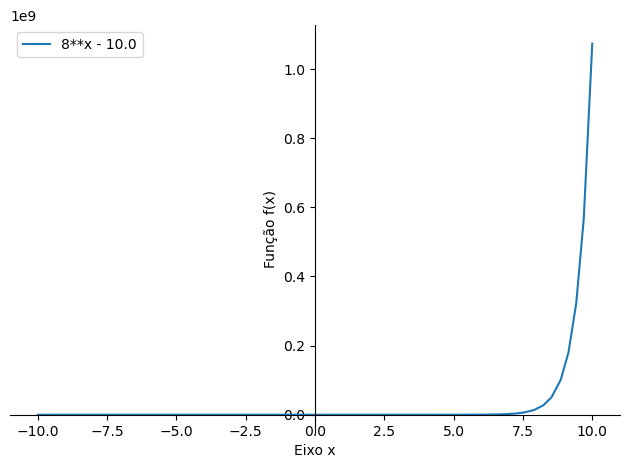

f(x) = 8**x - 10.0


In [ ]:
# Importando as bibliotecas em python
import sympy as sp
import math 

#Inserir informações

x = sp.symbols('x')    #definir x como sendo uma variável
f = sp.simplify(input('Insira a função:'))    #Inserir a função f(x) 
y = float(input('Insira o valor da função que deseja achar:'))    #inserir o valor desejado
f = f - y  
print(f'f(x) = {f}')    #mostrar a função f(x) que será usada nas iterações
f_a =sp.lambdify(x, f, "math")   
P_x = float(input('insira o erro de |b-a| desejado:'))    
P_f = float(input('insira o erro de |f(x)| desejado:'))
N_I = int(input('Insira o número máximo de iterações:'))
Met = input('qual método você deseja: [1] Bissecção [2] Falsa posição [3] Newton - Rapshon:')

#Método da bissecção

if Met == '1':
    a = float(input('insira o menor valor do intervalo:'))
    b = float(input('insira o maior valor do intervalo:'))
    E_x = abs((b-a))
    E_f = abs(f_a(a))
    n = a
    C = 0
    h = f_a(a)*f_a(b)
    if h>0:
        print('Não há raiz nesse intervalo')
    else:
        while P_x < E_x or P_f < E_f and C < N_I:
            C += 1
            print(f'{C}° iteração\n -->[a{C}, b{C}] = [{a}, {b}]\n  -->x{C} = {n} // f(x{C}) = {f_a(n)}\n   -->|f(x{C})| = {E_f} e |x{C}-x{C-1}| = {E_x}')
            n = (b + a)/2
            E_x = abs(a - n if f_a(n)<0 else b -n)
            E_f = abs(f_a(n))
            if f_a(n)<0:
                a = n
            else:
                b = n 
        print(f'{C+1}° iteração\n -->[a{C+1}, b{C+1}] = [{a}, {b}]\n  -->x{C+1} = {n} // f(x{C+1}) = {f_a(n)}\n   -->|f(x{C+1})| = {E_f} e |x{C+1}-x{C}| = {E_x}')

#Método da falsa posição

if Met == '2':
    a = float(input('insira o menor valor do intervalo:'))
    b = float(input('insira o maior valor do intervalo:'))
    E_x = abs((b-a))
    E_f = abs(f_a(a))
    n = a
    C = 0
    if f_a(a)*f_a(b)>0:
        print('Não há raiz nesse intervalo')
    else:     
        while P_x < E_x or P_f < E_f and C < N_I:
            C += 1
            print(f'{C}° iteração\n -->[a{C}, b{C}] = [{a}, {b}]\n  -->x{C} = {n} // f(x{C}) = {f_a(n)}\n   -->|f(x{C})| = {E_f} e |x{C}-x{C-1}| = {E_x}')
            n = float(a*f_a(b) - b*f_a(a))/(f_a(b)-f_a(a))
            E_x = abs(a - n if f_a(n)<0 else b -n)
            E_f = abs(f_a(n))
            if f_a(n)<0: 
                a = n
            else:
                b = n
        print(f'{C+1}° iteração\n -->[a{C+1}, b{C+1}] = [{a}, {b}]\n  -->x{C+1} = {n} // f(x{C+1}) = {f_a(n)}\n   -->|f(x{C+1})| = {E_f} e |x{C+1}-x{C}| = {E_x}')
        
#Método de Newton - Raphson

if Met == '3':
    f_der = f.diff(x)    #Calculo da derivada
    f_b =sp.lambdify(x, f_der, "math")
    print(f"A derivada da função é: \n f'(x) = {f_der}")
    a = float(input('insira o "chute" inicial:'))
    E_x = abs((b-a))
    E_f = abs(f_a(a))
    C = 0 
    if  (a - (f_a(a)/f_b(a)))<0 :
        print('não há como usar esse método')
    else:   
        while P_x < E_x or P_f < E_f and C < N_I:
            C += 1
            print(f"{C}° iteração\n -->x{C} = {a} // f(x{C}) = {f_a(a)} // f'(x{C}) = {f_b(a)}\n  -->|f(x{C})| = {E_f} e |x{C}-x{C-1}| = {E_x}")
            b = a 
            a = a - (f_a(a)/f_b(a))
            E_f = abs((f_a(a)))
            E_x = abs(a - b)
                
        print(f"{C+1}° iteração\n -->x{C+1} = {a} // f(x{C+1}) = {f_a(a)} // f'(x{C+1}) = {f_b(a)}\n  -->|f(x{C+1})| = {E_f} e |x{C+1}-x{C}| = {E_x}")